**Actividad 2 - Limpieza de datos - Minería de Datos**

Estudiante: Diego Felipe Pulido Sastoque

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mineria_colombia.csv')

In [4]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(45215, 11)
Codigo DANE                  int64
Municipio Productor         object
Departamento                object
Recurso Natural             object
Nombre Del Proyecto         object
Año Produccion               int64
Trimestre                   object
Unidad Medida               object
Tipo Contraprestacion       object
Valor Contraprestacion     float64
Cantidad Producción        float64
dtype: object


In [5]:
# Comprabación de subconjuntos numéricos
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Codigo DANE' 'Año Produccion' 'Valor Contraprestacion '
 'Cantidad Producción']


In [6]:
# Comprabación de subconjuntos no numéricos
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Municipio Productor' 'Departamento' 'Recurso Natural'
 'Nombre Del Proyecto' 'Trimestre' 'Unidad Medida' 'Tipo Contraprestacion']


Basados en estos resultados, podemos observar que hay 45.215 instancias y 11 columnas. Hay 4 columnas numéricas y 7 columnas no numéricas.

**Se realizaran todos los pasos de limpieza de datos sugeridos en el script brindado por la profesora con el fin de conocer cada herramienta**

##**Missing Values**

Se realizará el análisis de datos perdidos en la base de datos.

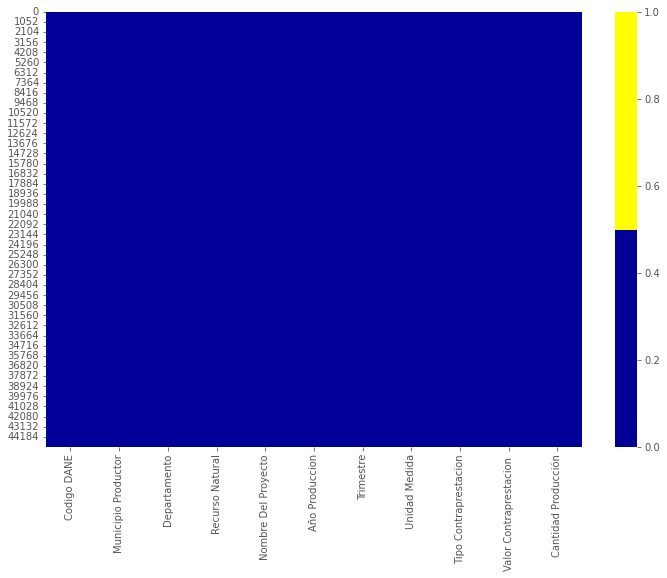

In [10]:
cols = df.columns[:11] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

##Missing Data Percentage List


In [11]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Codigo DANE - 0%
Municipio Productor - 0%
Departamento - 0%
Recurso Natural - 0%
Nombre Del Proyecto - 0%
Año Produccion - 0%
Trimestre - 0%
Unidad Medida - 0%
Tipo Contraprestacion - 0%
Valor Contraprestacion  - 0%
Cantidad Producción - 0%


##Missing Data Histogram

created missing indicator for: Valor Contraprestacion 
created missing indicator for: Cantidad Producción


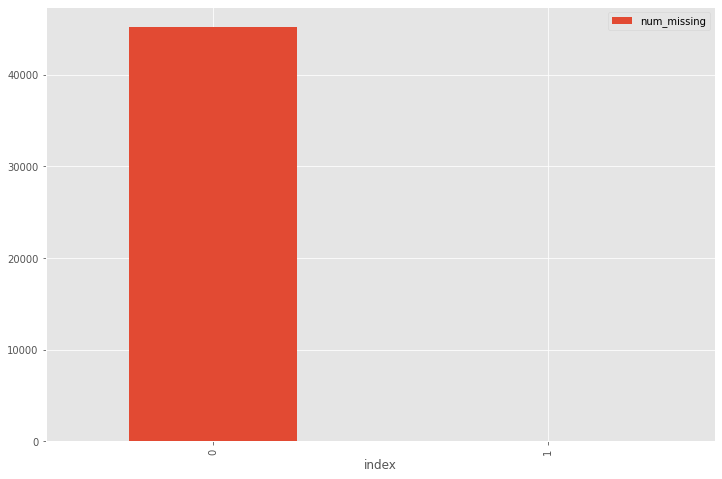

In [12]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

## Outliers (Datos fuera de rango)

Se realizará el análisis de datos fuera de rango para la columna "Valor Contraprestación".




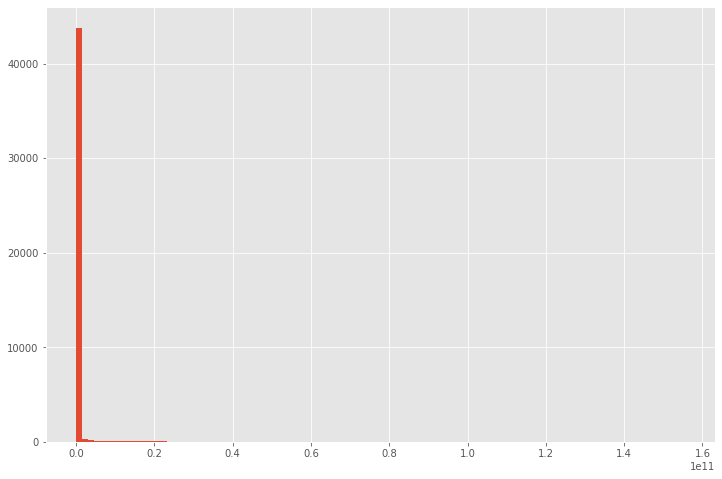

In [8]:
# histogram of life_sq.
df['Valor Contraprestacion '].hist(bins=100)

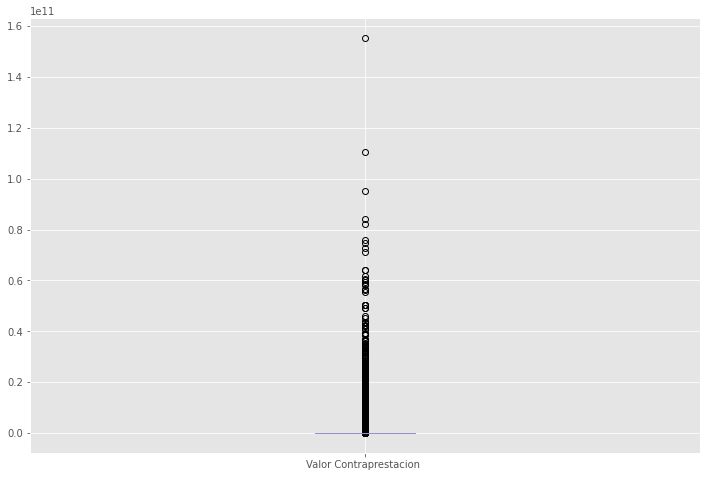

In [9]:
# box plot.
df.boxplot(column=['Valor Contraprestacion '])

Se realizará el análisis de datos fuera de rango para la columna "Cantidad Producción".

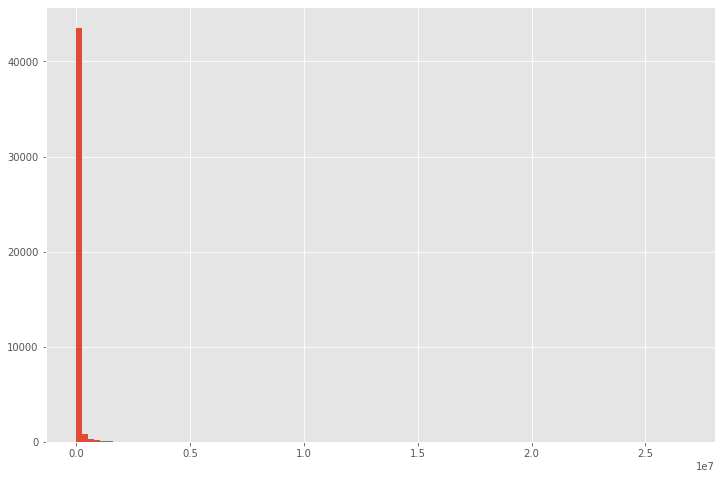

In [13]:
# histogram of life_sq.
df['Cantidad Producción'].hist(bins=100)

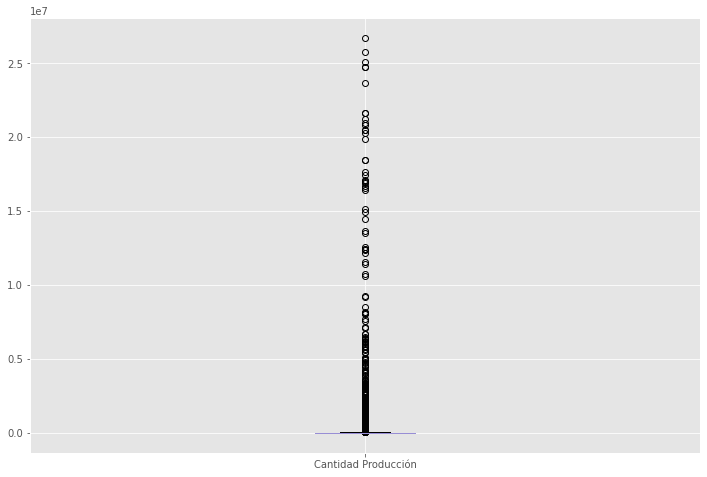

In [14]:
# box plot.
df.boxplot(column=['Cantidad Producción'])

**##Análisis de los resultados y comparación con la propuesta del proceso KDD de la actividad 1.**

En la actividad 1 se presentó el proceso KDD para el tratamiento de una base de datos elegida por el estudiante. Se realizó un análisis previo de la base de datos para identificar posibles datos que necesitaran un proceso de limpieza y se identificaron datos inconsistentes y una columna que no aportaba información. Realizando la comparación con el aproximado del Data Set final se logró identificar que cerca de 1000 instancias eran inconsistentes, pero al realizar varias consultas con profesional con experencia en el campo de la minería y procesos con la Agencia Nacional Minera, se observaron los datos inconsistentes mencionados en la actividad 1 y en efecto hay empresas mineras que sin producir material minero realizan pagos de valor de contraprestación de diferentes montos, pero es debido a deudas pasadas o pequeños impuestos que deben pagar los mineros por no estar en operación, pero aún mantener el estatus de minero activo. Dependiendo del tamaño, en área, del título minero se pagan valores "simbólicos" que no son de gran cantidad en pesos Colombianos. Aunque, para el objetivo fijado en la actividad 1 de poder saber cuál sería la evolución económica de los municipios y departamentos mineros en un intervalo de tiempo futuro, esta cantidad de instancias (aprox. 1000) solo representan el 2,2 % del total de los datos que estaría dentro de un rango aceptable (~5%) de valores con inconsistencia para un modelo de pronóstico. Por otro lado, esta observación sobre datos inconsistentes nos permite poder identificar cuales y cuantas empresas mineras tienen deudas con el estado y en qué proporción, lo que ayudaría a alimentar el análisis de pronóstico de evolución económica porque se tendría una varia de empresas deudoras. Por este motivo se decide por conservar las instancias calificadas como datos fuera de rango, pero que se pueden obviar al momento de realizar el montaje de información al modelo de pronóstico.